In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CarDetails.csv')
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
final_dataset=df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type','transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']]
final_dataset.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"


In [ ]:
final_dataset['Current_Year']=2022

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final_dataset['no_of_year']=final_dataset['Current_Year']-final_dataset['year']

In [ ]:
final_dataset.drop(['year'],axis=1,inplace=True)
final_dataset.drop(['Current_Year'],axis=1,inplace=True)
final_dataset.drop(['torque'],axis=1,inplace=True)
final_dataset.drop(['max_power'],axis=1,inplace=True)
final_dataset.drop(['engine'],axis=1,inplace=True)
final_dataset.drop(['mileage'],axis=1,inplace=True)

In [ ]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset.head()

,selling_price,km_driven,no_of_year,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,8,1,0,0,1,0,1,0,0,0,0
1,370000,120000,8,1,0,0,1,0,1,0,1,0,0
2,158000,140000,16,0,0,1,1,0,1,0,0,0,1
3,225000,127000,12,1,0,0,1,0,1,0,0,0,0
4,130000,120000,15,0,0,1,1,0,1,0,0,0,0


In [ ]:
final_dataset.corr()

,selling_price,km_driven,no_of_year,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.225534,-0.414092,0.206521,-0.037222,-0.195975,-0.386244,0.035084,-0.588845,-0.075669,-0.179881,0.115880,-0.118956
km_driven,-0.225534,1.000000,0.418006,0.266368,0.023458,-0.269802,0.204736,-0.084282,0.201229,0.094939,0.209532,-0.024214,0.145634
no_of_year,-0.414092,0.418006,1.000000,-0.051762,0.070712,0.044633,0.246161,-0.102238,0.244707,0.207020,0.311225,-0.031877,0.280220
fuel_Diesel,0.206521,0.266368,-0.051762,1.000000,-0.074494,-0.976687,-0.000239,-0.137961,0.025519,-0.010638,0.046762,-0.017008,-0.014272
fuel_LPG,-0.037222,0.023458,0.070712,-0.074494,1.000000,-0.061584,0.021092,-0.011852,0.026397,0.014785,0.017122,-0.001700,0.017199
fuel_Petrol,-0.195975,-0.269802,0.044633,-0.976687,-0.061584,1.000000,-0.008983,0.142335,-0.034631,0.007300,-0.051046,0.017630,0.012820
seller_type_Individual,-0.386244,0.204736,0.246161,-0.000239,0.021092,-0.008983,1.000000,-0.385425,0.375234,0.066360,0.165983,-0.055297,0.116236
seller_type_Trustmark Dealer,0.035084,-0.084282,-0.102238,-0.137961,-0.011852,0.142335,-0.385425,1.000000,-0.149677,-0.025577,-0.047034,-0.004290,-0.046814
transmission_Manual,-0.588845,0.201229,0.244707,0.025519,0.026397,-0.034631,0.375234,-0.149677,1.000000,0.041761,0.119681,-0.049621,0.072274
owner_Fourth & Above Owner,-0.075669,0.094939,0.207020,-0.010638,0.014785,0.007300,0.066360,-0.025577,0.041761,1.000000,-0.087438,-0.003670,-0.040040


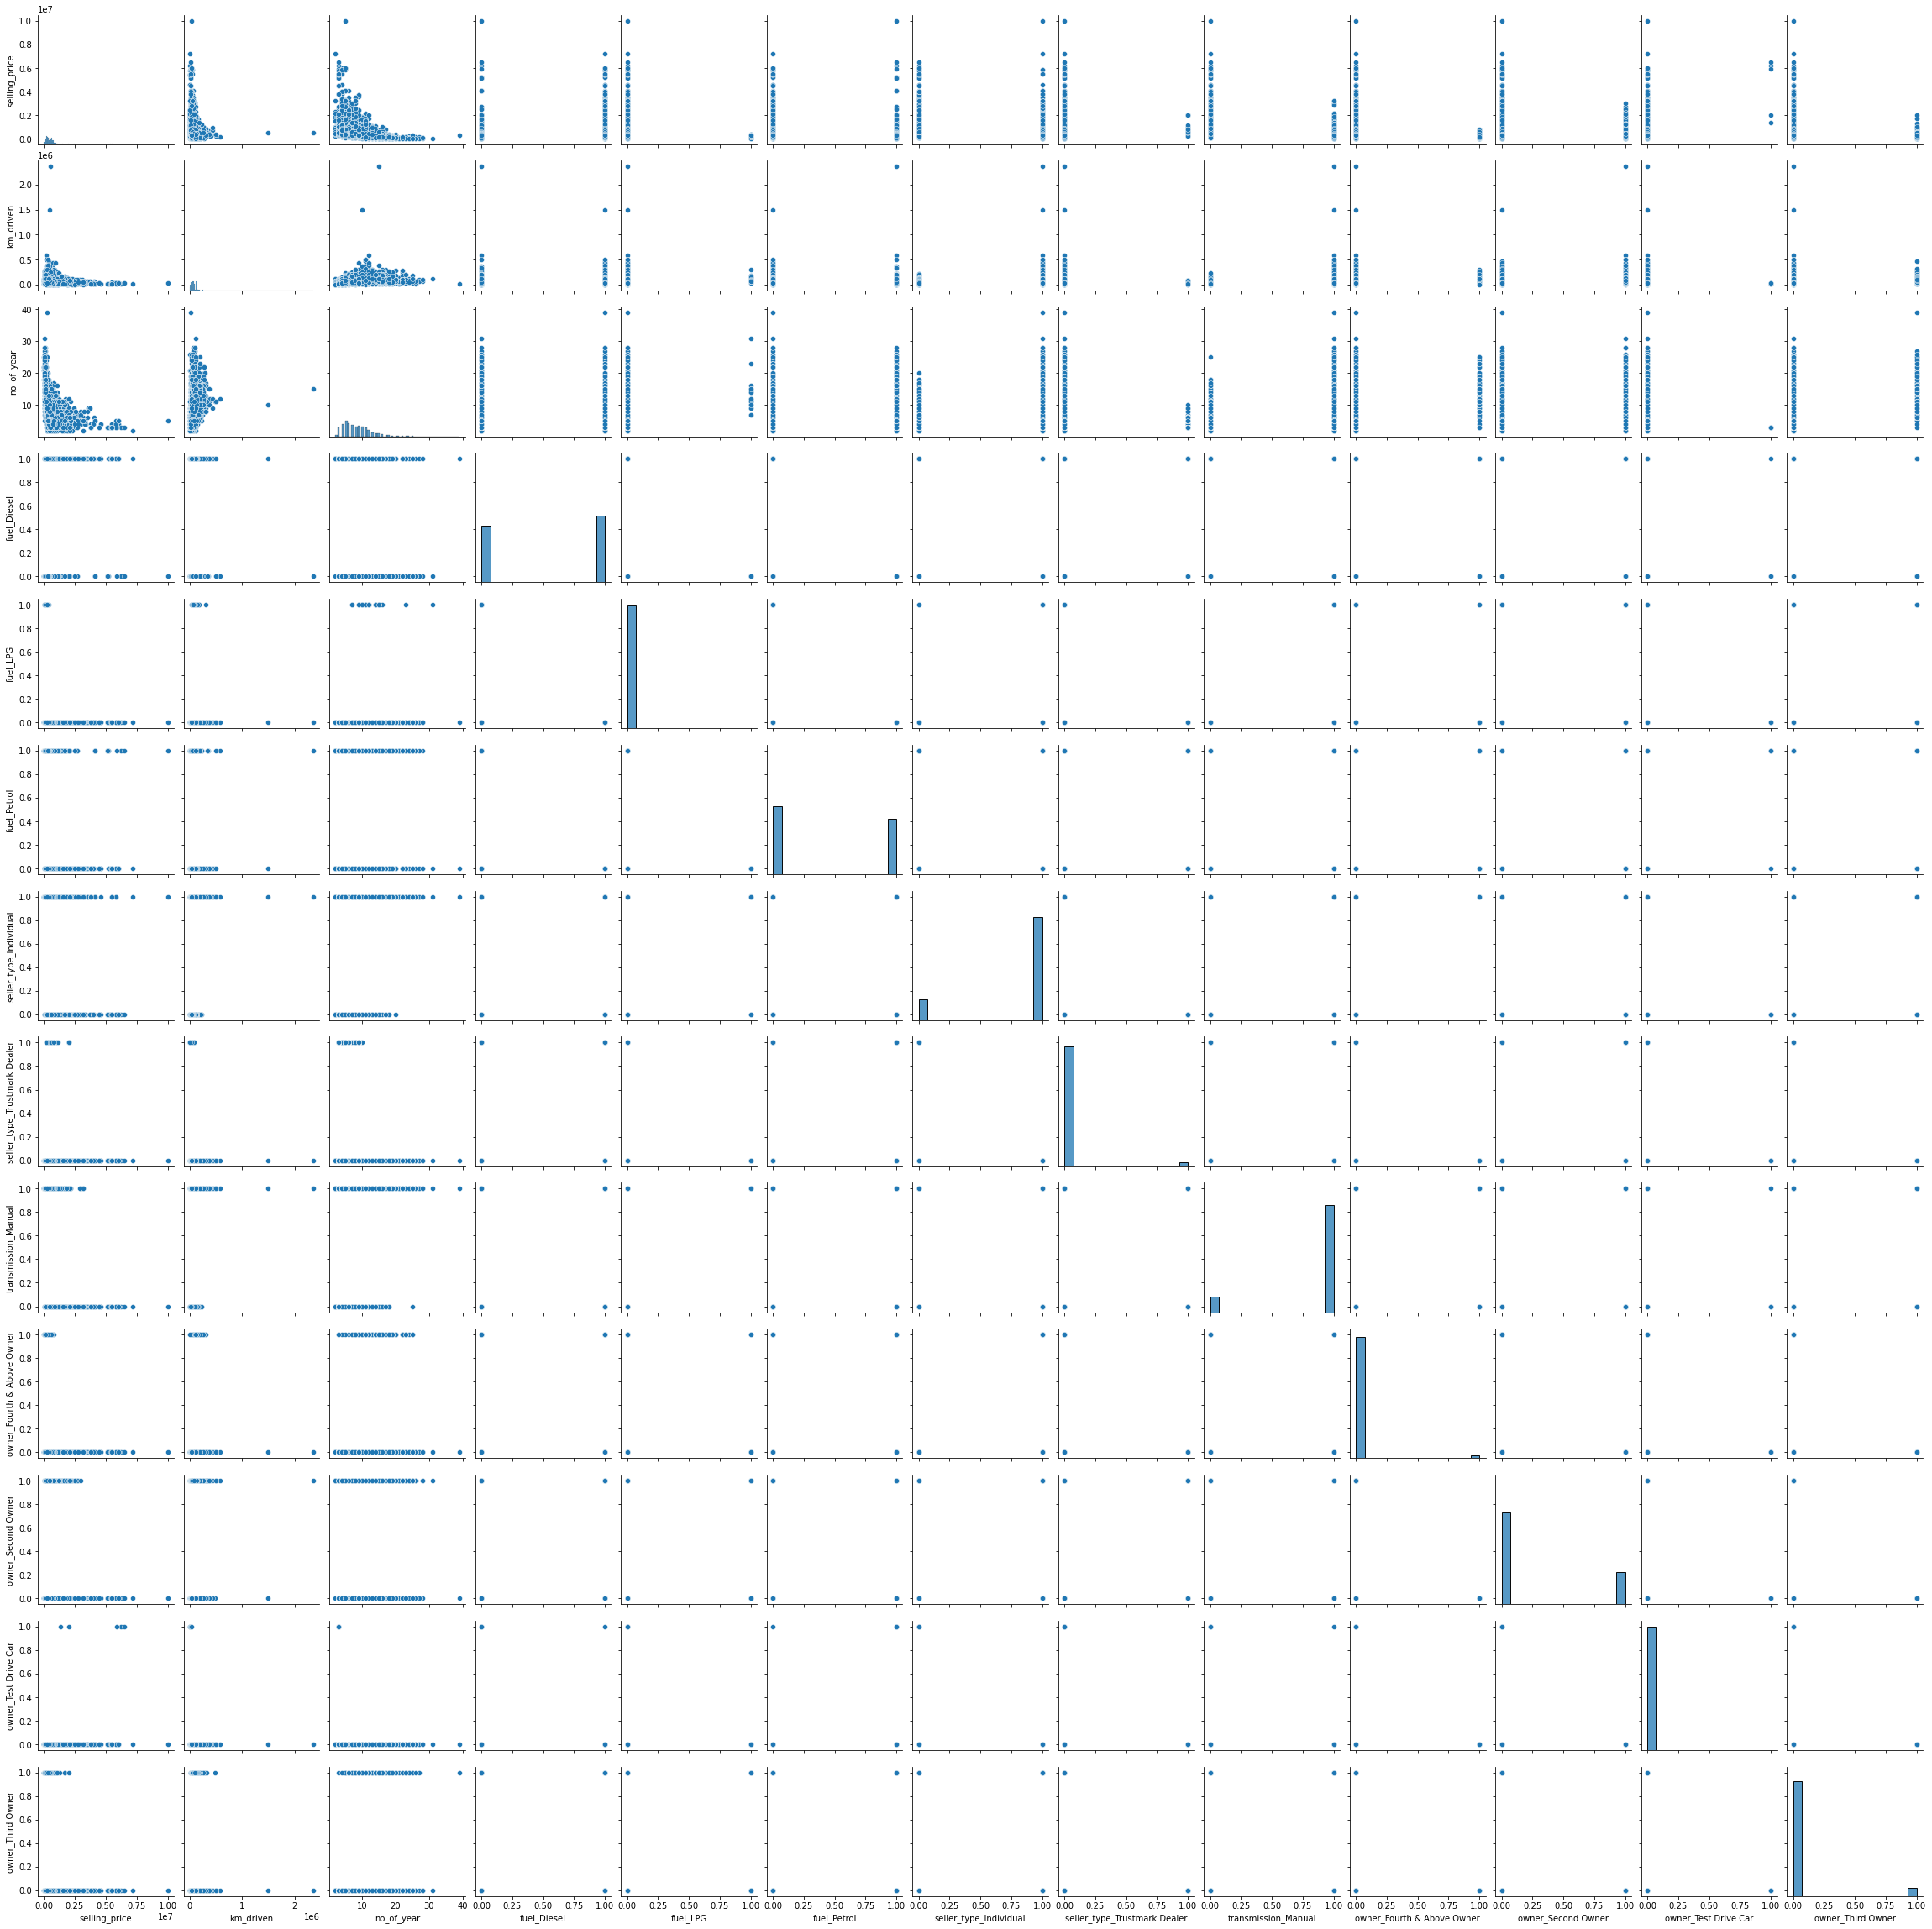

In [ ]:
import seaborn as sns
sns.pairplot(final_dataset)

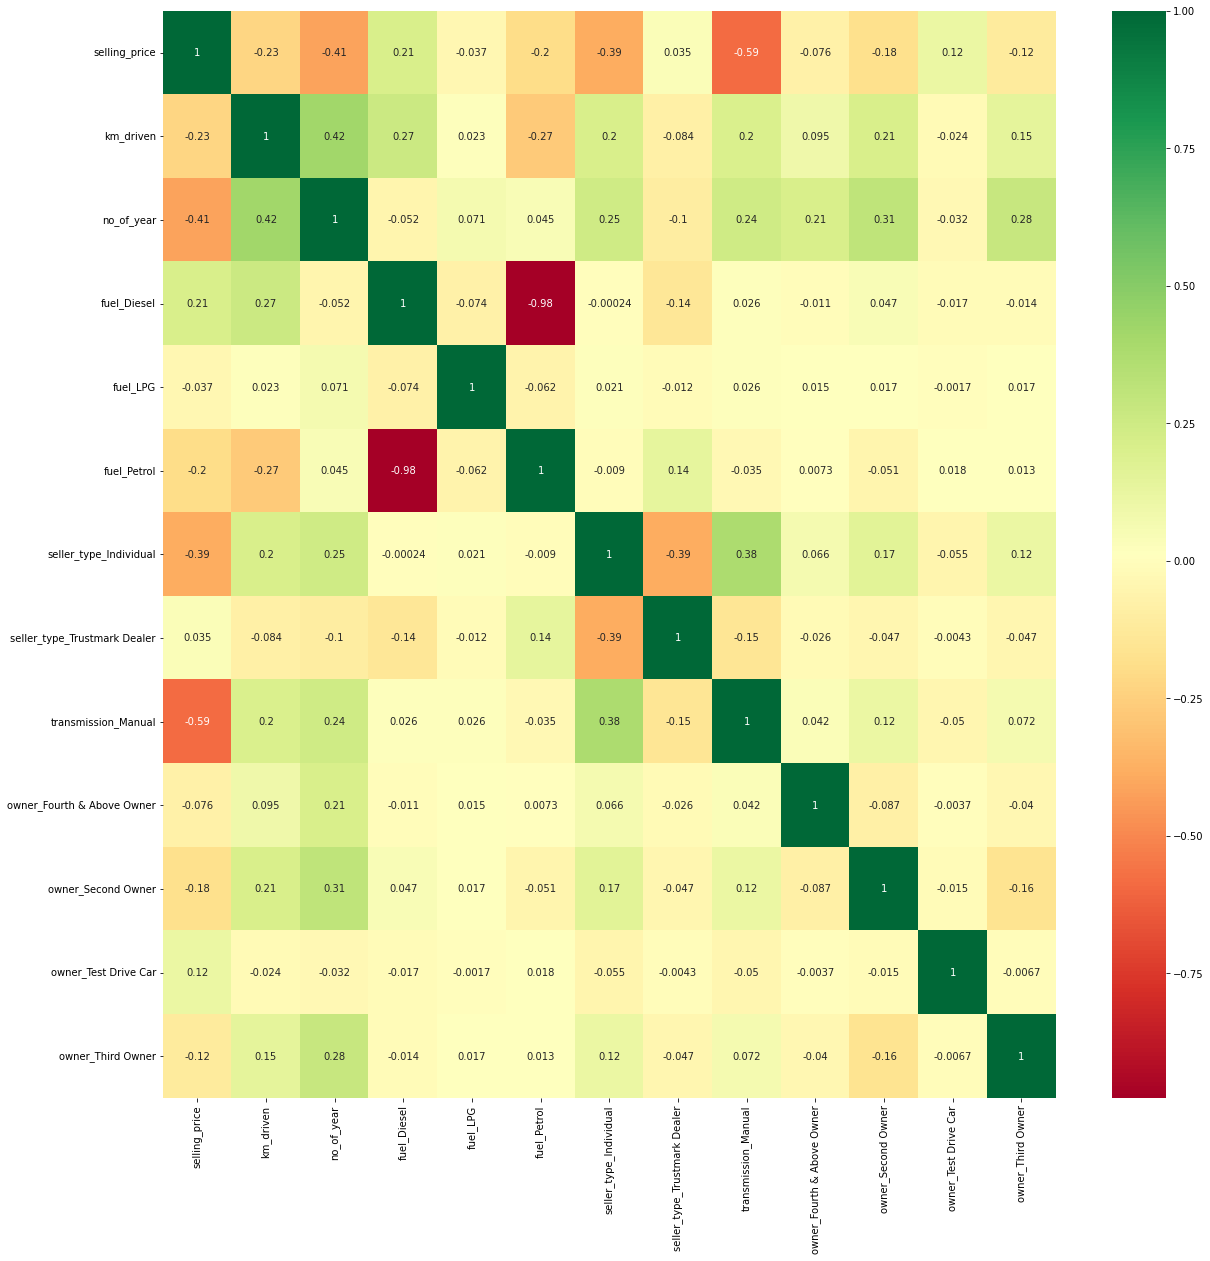

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
corrmat = final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
##independent and dependent features
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [ ]:
X.head()

,km_driven,no_of_year,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500,8,1,0,0,1,0,1,0,0,0,0
1,120000,8,1,0,0,1,0,1,0,1,0,0
2,140000,16,0,0,1,1,0,1,0,0,0,1
3,127000,12,1,0,0,1,0,1,0,0,0,0
4,120000,15,0,0,1,1,0,1,0,0,0,0


In [ ]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [ ]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[2.15863549e-01 2.03477086e-01 6.30659822e-02 7.22453000e-06
 4.99199090e-02 6.46846397e-02 1.38115280e-02 3.65846756e-01
 8.19552349e-04 9.72408225e-03 1.04109397e-02 2.36875257e-03]


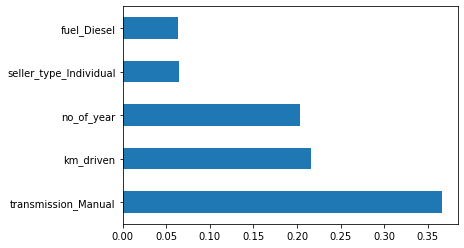

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
regressor=RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


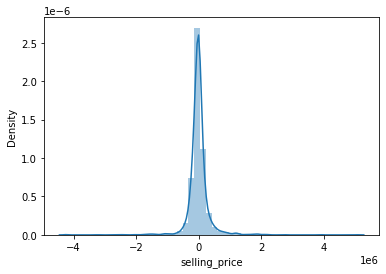

In [ ]:
predictions=rf_random.predict(X_test)
sns.distplot(y_test-predictions)

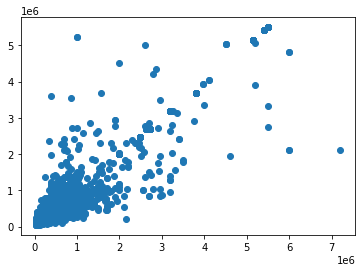

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [55]:
prediction=model.predict([[50000,10,1,0,0,1,0,1,0,0,0,0]])
output=round(prediction[0],2)
print(output)

271249.5


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
